In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline
sns.set_style("darkgrid")

# 데이터 불러오기

In [19]:
df = pd.read_parquet('data/df_nov_col_9g.parquet.gzip') 

In [20]:
df

,event_time,event_type,product_id,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:01 UTC,view,1004775,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
2,2019-11-01 00:00:02 UTC,view,1004258,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0
3,2019-11-01 00:00:07 UTC,view,1004566,huawei,164.84,566265908,52c2c76c-b79e-4794-86ff-badc76d35f5a
4,2019-11-01 00:00:08 UTC,view,1004708,huawei,151.99,566143627,aa610ab3-5c60-4551-8a2b-8c999dddf843
...,...,...,...,...,...,...,...
16374995,2019-11-30 23:59:47 UTC,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d
16374996,2019-11-30 23:59:54 UTC,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb
16374997,2019-11-30 23:59:54 UTC,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26
16374998,2019-11-30 23:59:59 UTC,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb


## 데이터 정보 확인

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16375000 entries, 0 to 16374999
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   brand         object 
 4   price         float64
 5   user_id       int64  
 6   user_session  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 874.5+ MB


In [22]:
df.shape

(16375000, 7)

# 데이터 전처리
### 결측치 제거

In [25]:
df.isnull().sum()

event_time          0
event_type          0
product_id          0
brand           21418
price               0
user_id             0
user_session        3
dtype: int64

In [24]:
df.isnull().sum().sum()

21421

In [26]:
df = df.dropna()
df.shape

(16353579, 7)

### dtype 변환

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16353579 entries, 0 to 16374999
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   brand         object 
 4   price         float64
 5   user_id       int64  
 6   user_session  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 998.1+ MB


---

In [34]:
cols = ['event_time','event_type','price','user_id']
df_5g = pd.read_csv('data/2019-Oct.csv', usecols = cols)
df_5g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   event_time  object 
 1   event_type  object 
 2   price       float64
 3   user_id     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ GB


In [35]:
df_5g

,event_time,event_type,price,user_id
0,2019-10-01 00:00:00 UTC,view,35.79,541312140
1,2019-10-01 00:00:00 UTC,view,33.20,554748717
2,2019-10-01 00:00:01 UTC,view,543.10,519107250
3,2019-10-01 00:00:01 UTC,view,251.74,550050854
4,2019-10-01 00:00:04 UTC,view,1081.98,535871217
...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,527.40,537931532
42448760,2019-10-31 23:59:58 UTC,view,61.75,527322328
42448761,2019-10-31 23:59:58 UTC,view,128.70,566280422
42448762,2019-10-31 23:59:59 UTC,view,689.85,513118352


In [40]:
df_5g.to_parquet('rfm_df_5g.parquet.gzip', compression='gzip')

# RFM
## RFM 데이터 불러오기

In [2]:
df_5g_p = pd.read_parquet('rfm_df_5g.parquet.gzip')
df_5g_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   event_time  object 
 1   event_type  object 
 2   price       float64
 3   user_id     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ GB


## 데이터 dtype 변경

In [4]:
df_5g_p['event_time'] = pd.to_datetime(df_5g_p['event_time'])

In [5]:
df_5g_p

,event_time,event_type,price,user_id
0,2019-10-01 00:00:00+00:00,view,35.79,541312140
1,2019-10-01 00:00:00+00:00,view,33.20,554748717
2,2019-10-01 00:00:01+00:00,view,543.10,519107250
3,2019-10-01 00:00:01+00:00,view,251.74,550050854
4,2019-10-01 00:00:04+00:00,view,1081.98,535871217
...,...,...,...,...
42448759,2019-10-31 23:59:58+00:00,view,527.40,537931532
42448760,2019-10-31 23:59:58+00:00,view,61.75,527322328
42448761,2019-10-31 23:59:58+00:00,view,128.70,566280422
42448762,2019-10-31 23:59:59+00:00,view,689.85,513118352


In [6]:
# event_type -> category
# user_id -> uint64

df_5g_p['event_type'] = df_5g_p['event_type'].astype('category')
df_5g_p['user_id']= pd.to_numeric(df_5g_p['user_id'], downcast = 'unsigned')

df_5g_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 4 columns):
 #   Column      Dtype              
---  ------      -----              
 0   event_time  datetime64[ns, UTC]
 1   event_type  category           
 2   price       float64            
 3   user_id     uint32             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), uint32(1)
memory usage: 850.1 MB


In [7]:
df_5g_p.to_parquet('rfm_df_5g_전처리완료.parquet.gzip', compression='gzip')

## purchase 데이터만 가져오기

In [8]:
df_5g_p['event_type'].value_counts()

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

In [9]:
df_purchase = df_5g_p[df_5g_p['event_type'] == 'purchase']
df_purchase

,event_time,event_type,price,user_id
162,2019-10-01 00:02:14+00:00,purchase,130.76,543272936
308,2019-10-01 00:04:37+00:00,purchase,642.69,551377651
379,2019-10-01 00:06:02+00:00,purchase,29.51,514591159
442,2019-10-01 00:07:07+00:00,purchase,54.42,555332717
574,2019-10-01 00:09:26+00:00,purchase,189.91,524601178
...,...,...,...,...
42448148,2019-10-31 23:55:13+00:00,purchase,102.45,516604399
42448173,2019-10-31 23:55:21+00:00,purchase,20.59,514622109
42448271,2019-10-31 23:56:03+00:00,purchase,577.89,512717356
42448362,2019-10-31 23:56:53+00:00,purchase,1054.60,533892594


## 9g 데이터와 합치기

In [10]:
df_9g = pd.read_parquet('data/df_clean_9g.parquet.gzip')
df_9g

,event_time,event_type,product_id,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:01+00:00,view,1004775,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
2,2019-11-01 00:00:02+00:00,view,1004258,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0
3,2019-11-01 00:00:07+00:00,view,1004566,huawei,164.84,566265908,52c2c76c-b79e-4794-86ff-badc76d35f5a
4,2019-11-01 00:00:08+00:00,view,1004708,huawei,151.99,566143627,aa610ab3-5c60-4551-8a2b-8c999dddf843
...,...,...,...,...,...,...,...
16374995,2019-11-30 23:59:47+00:00,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d
16374996,2019-11-30 23:59:54+00:00,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb
16374997,2019-11-30 23:59:54+00:00,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26
16374998,2019-11-30 23:59:59+00:00,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb


In [11]:
df_9g_purchase = df_9g[df_9g['event_type']=='purchase'][['event_time','event_type','price','user_id']]
df_9g_purchase

,event_time,event_type,price,user_id
32,2019-11-01 00:01:04+00:00,purchase,211.92,513351129
142,2019-11-01 00:04:51+00:00,purchase,128.42,562958505
368,2019-11-01 00:10:47+00:00,purchase,1583.48,562210838
382,2019-11-01 00:11:04+00:00,purchase,531.26,549256216
393,2019-11-01 00:11:15+00:00,purchase,128.42,513645631
...,...,...,...,...
16374931,2019-11-30 23:57:30+00:00,purchase,346.70,547804983
16374952,2019-11-30 23:58:08+00:00,purchase,235.60,574868869
16374956,2019-11-30 23:58:14+00:00,purchase,346.70,547804983
16374960,2019-11-30 23:58:22+00:00,purchase,1437.02,515582054


In [12]:
df_purchase = pd.concat([df_purchase,df_9g_purchase])

In [13]:
df_purchase

,event_time,event_type,price,user_id
162,2019-10-01 00:02:14+00:00,purchase,130.76,543272936
308,2019-10-01 00:04:37+00:00,purchase,642.69,551377651
379,2019-10-01 00:06:02+00:00,purchase,29.51,514591159
442,2019-10-01 00:07:07+00:00,purchase,54.42,555332717
574,2019-10-01 00:09:26+00:00,purchase,189.91,524601178
...,...,...,...,...
16374931,2019-11-30 23:57:30+00:00,purchase,346.70,547804983
16374952,2019-11-30 23:58:08+00:00,purchase,235.60,574868869
16374956,2019-11-30 23:58:14+00:00,purchase,346.70,547804983
16374960,2019-11-30 23:58:22+00:00,purchase,1437.02,515582054


## 구매 금액 확인

In [14]:
df_purchase['price'].describe().map('{:.2f}'.format)

count    1125341.00
mean         362.29
std          375.14
min            0.77
25%          127.09
50%          217.51
75%          465.72
max         2574.07
Name: price, dtype: object

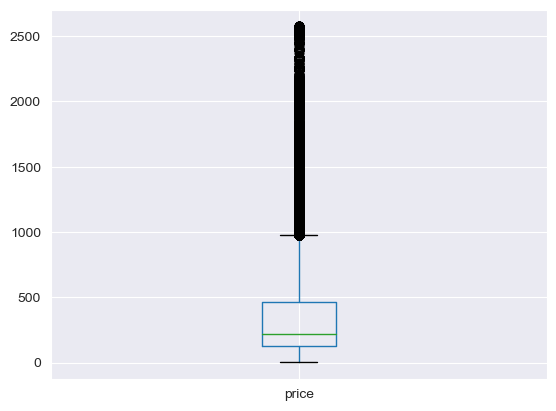

In [15]:
df_purchase.boxplot(column = ['price']);

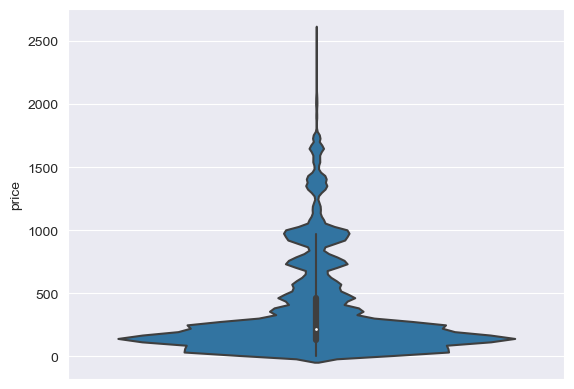

In [16]:
sns.violinplot(data = df_purchase, y = 'price');

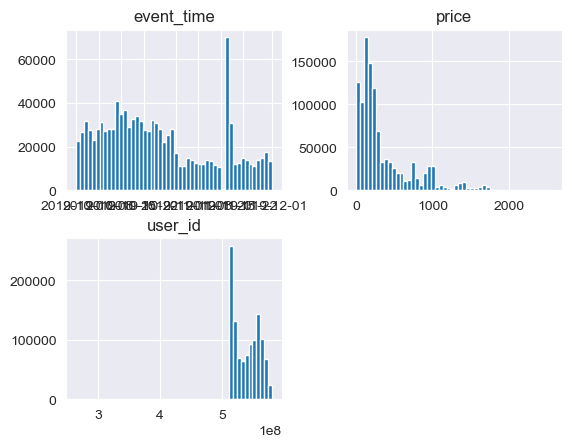

In [17]:
df_purchase.hist(bins = 50);

## 결측치 제거

In [18]:
df_purchase.isnull().sum()

event_time    0
event_type    0
price         0
user_id       0
dtype: int64

## 중복 데이터 확인 및 제거

In [19]:
df_purchase[df_purchase.duplicated(keep = False)].sort_values(['event_time'])

,event_time,event_type,price,user_id
238324,2019-10-01 06:41:39+00:00,purchase,130.76,555119233
238328,2019-10-01 06:41:39+00:00,purchase,130.76,555119233
649238,2019-10-01 12:42:40+00:00,purchase,254.19,512386086
649240,2019-10-01 12:42:40+00:00,purchase,254.19,512386086
3835331,2019-10-04 06:20:32+00:00,purchase,550.34,553283418
...,...,...,...,...
41381346,2019-10-31 05:32:56+00:00,purchase,955.26,514444813
41558414,2019-10-31 08:12:51+00:00,purchase,88.29,554272193
41558423,2019-10-31 08:12:51+00:00,purchase,88.29,554272193
505794,2019-11-02 08:27:41+00:00,purchase,229.90,547319531


In [20]:
df_purchase = df_purchase.drop_duplicates(ignore_index=True).copy()
df_purchase

,event_time,event_type,price,user_id
0,2019-10-01 00:02:14+00:00,purchase,130.76,543272936
1,2019-10-01 00:04:37+00:00,purchase,642.69,551377651
2,2019-10-01 00:06:02+00:00,purchase,29.51,514591159
3,2019-10-01 00:07:07+00:00,purchase,54.42,555332717
4,2019-10-01 00:09:26+00:00,purchase,189.91,524601178
...,...,...,...,...
1125259,2019-11-30 23:57:30+00:00,purchase,346.70,547804983
1125260,2019-11-30 23:58:08+00:00,purchase,235.60,574868869
1125261,2019-11-30 23:58:14+00:00,purchase,346.70,547804983
1125262,2019-11-30 23:58:22+00:00,purchase,1437.02,515582054


## RFM 계산
### 전체 주문에서 최근 주문일 구하기

In [21]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
last_timestamp = df_purchase['event_time'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:58:57+0000', tz='UTC')

In [22]:
rfm = df_purchase.groupby('user_id').agg({'event_time': lambda x : (last_timestamp - x.max()).days,'price':['count','sum']})
rfm

event_time price         
            <lambda> count      sum
user_id                            
264649825         56     2  1240.04
299358698         22     1   154.19
303160429         49     1   340.59
304707635         18     1  2007.52
307138432         23     1   106.57
...              ...   ...      ...
579962593          1     1   121.24
579962677          1     1  1634.38
579963523          1     1   457.91
579966375          1     1   124.11
579967058          1     1   124.11

[495162 rows x 3 columns]

In [23]:
cols = ['Recency','Frequency','MonetaryValue']
rfm.columns = cols

rfm

,Recency,Frequency,MonetaryValue
user_id,,,
264649825,56,2,1240.04
299358698,22,1,154.19
303160429,49,1,340.59
304707635,18,1,2007.52
307138432,23,1,106.57
...,...,...,...
579962593,1,1,121.24
579962677,1,1,1634.38
579963523,1,1,457.91


<AxesSubplot:>

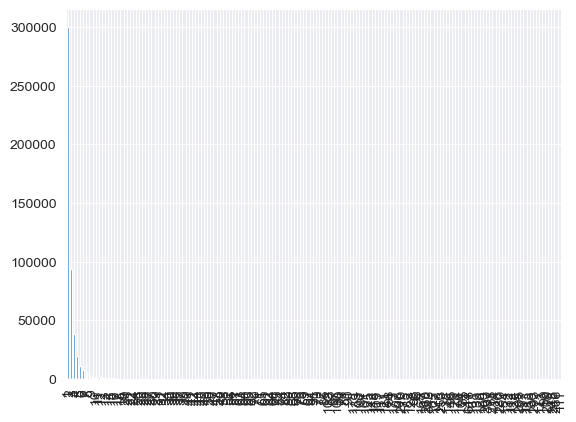

In [26]:
rfm.Frequency.value_counts().plot.bar()

In [27]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,495162.000000,495162.000000,495162.000000
mean,33.034659,2.272517,823.328124
std,17.290566,4.278627,2479.600823
min,1.000000,1.000000,0.880000
25%,15.000000,1.000000,136.170000
50%,36.000000,1.000000,286.410000
75%,47.000000,2.000000,793.947500
max,61.000000,618.000000,302305.680000


### RFM변수만들기

In [28]:
print(rfm['Frequency'].min(), rfm['Frequency'].max())

1 618


In [29]:
cut_size = 5
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
f_edges = [0, 1, 2, 3, 5, 618]

In [30]:
# qcut을 사용하여 등간격으로 나누기
r_cut = pd.qcut(rfm['Recency'], cut_size, labels = r_labels)
f_cut = pd.cut(rfm['Frequency'], bins=f_edges, labels=f_labels)
# f_cut = pd.qcut(rfm['Frequency'], cut_size, labels = f_labels)
m_cut = pd.qcut(rfm['MonetaryValue'], cut_size, labels = m_labels)

In [31]:
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
264649825,56,2,1240.04
299358698,22,1,154.19
303160429,49,1,340.59
304707635,18,1,2007.52
307138432,23,1,106.57
...,...,...,...
579962593,1,1,121.24
579962677,1,1,1634.38
579963523,1,1,457.91


In [32]:
rfm = rfm.assign(R = r_cut, F = f_cut, M = m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
264649825,56,2,1240.04,1,2,5
299358698,22,1,154.19,4,1,2
303160429,49,1,340.59,2,1,3
304707635,18,1,2007.52,4,1,5
307138432,23,1,106.57,4,1,1
...,...,...,...,...,...,...
579962593,1,1,121.24,5,1,1
579962677,1,1,1634.38,5,1,5
579963523,1,1,457.91,5,1,4


In [33]:
rfm["RFM_segment"] = (rfm['R'].astype(str)+rfm['F'].astype(str)+rfm['M'].astype(str)).astype(int)

In [34]:
rfm["RFM_score"] = rfm[['R','F','M']].sum(axis = 1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
264649825,56,2,1240.04,1,2,5,125,8
299358698,22,1,154.19,4,1,2,412,7
303160429,49,1,340.59,2,1,3,213,6
304707635,18,1,2007.52,4,1,5,415,10
307138432,23,1,106.57,4,1,1,411,6
...,...,...,...,...,...,...,...,...
579962593,1,1,121.24,5,1,1,511,7
579962677,1,1,1634.38,5,1,5,515,11
579963523,1,1,457.91,5,1,4,514,10


<AxesSubplot:xlabel='RFM_segment', ylabel='count'>

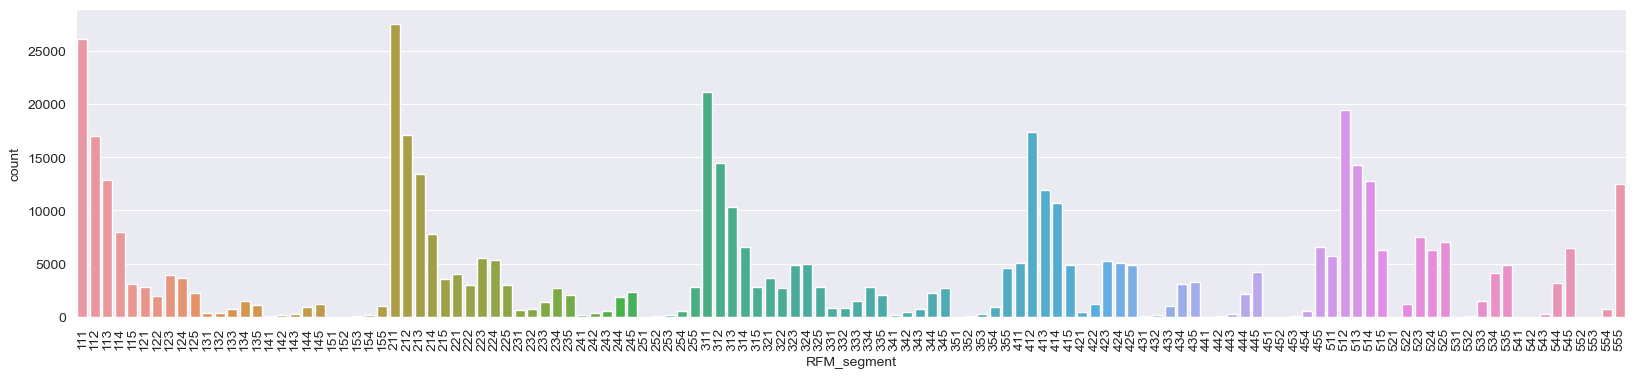

In [35]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.countplot(data = rfm.sort_values('RFM_score'), x = 'RFM_segment')

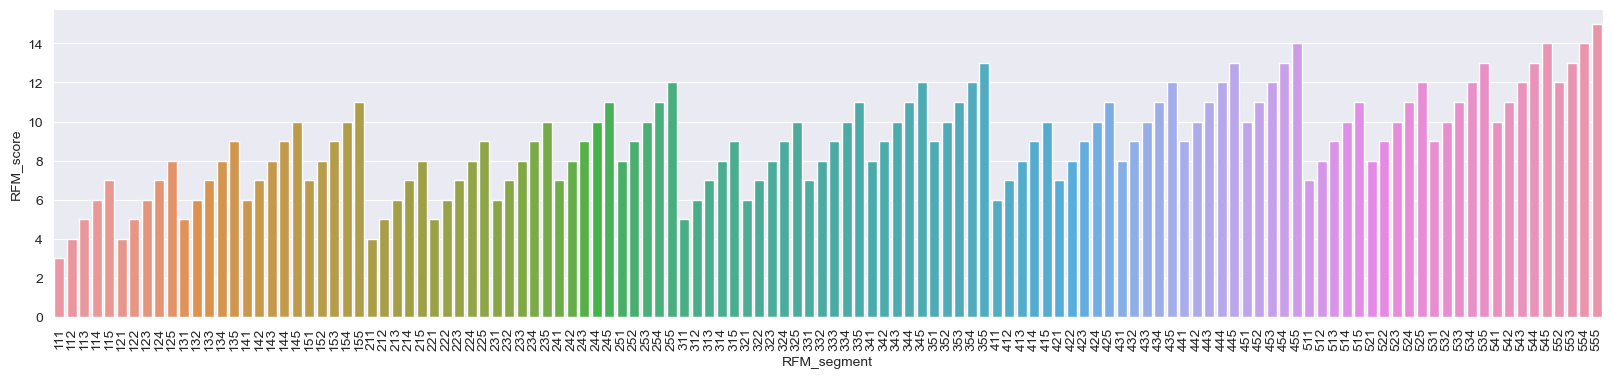

In [36]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data = rfm.sort_values('RFM_segment'), x = 'RFM_segment', y = 'RFM_score');

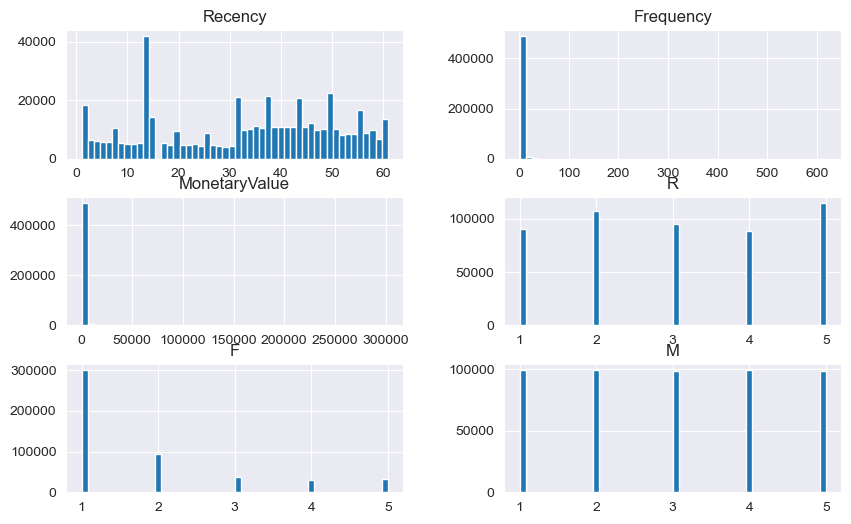

In [37]:
rfm.iloc[:,:-2].astype(float).hist(figsize=(10,6), bins = 50);

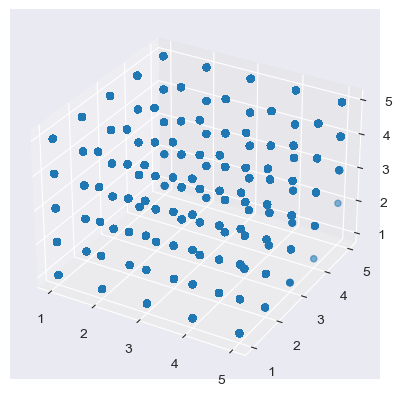

In [38]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['R'], rfm['F'], rfm['M']);

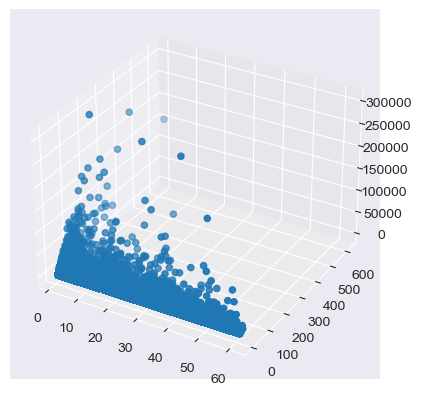

In [39]:
# rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue']);

In [40]:
# 문자열의 format 함수를 사용하여 소수점 아래는 표기하지 않도록({:,.0f}) 문자열 포맷을 지정합니다.
rfm.groupby(['RFM_score']).agg({'Recency':'mean',
                               'Frequency':'mean',
                               'MonetaryValue':['mean','sum']}).style.format('{:,.0f}').background_gradient(axis=0,cmap = 'Greens')

### qcut을 통한 고객군 나누기


In [41]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 
rfm["RFM_class"] = pd.qcut(rfm['RFM_score'],3,labels = ['silver','gold','platinum'])
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
264649825,56,2,1240.04,1,2,5,125,8,gold
299358698,22,1,154.19,4,1,2,412,7,gold
303160429,49,1,340.59,2,1,3,213,6,silver
304707635,18,1,2007.52,4,1,5,415,10,platinum
307138432,23,1,106.57,4,1,1,411,6,silver
...,...,...,...,...,...,...,...,...,...
579962593,1,1,121.24,5,1,1,511,7,gold
579962677,1,1,1634.38,5,1,5,515,11,platinum
579963523,1,1,457.91,5,1,4,514,10,platinum


In [42]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
# RFM_score에 따라 RFM_class의 값이 잘 나뉘었는지 확인
rfm.groupby(['RFM_class'])['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,183645.0,4.745525,1.024042,3.0,4.0,5.0,6.0,6.0
gold,169457.0,7.944299,0.801788,7.0,7.0,8.0,9.0,9.0
platinum,142060.0,11.749416,1.640064,10.0,10.0,11.0,13.0,15.0


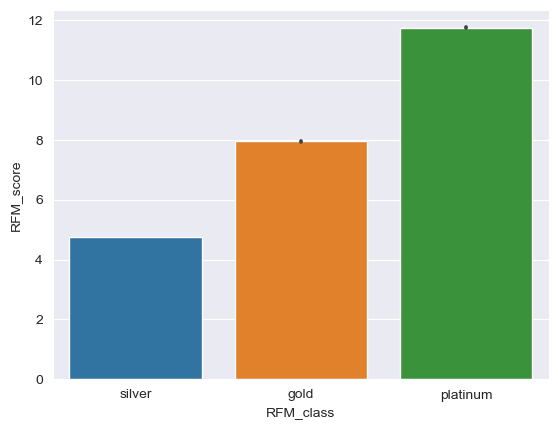

In [43]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score");

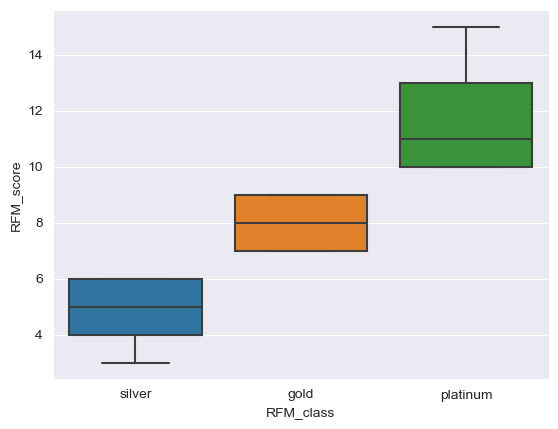

In [44]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score");

<AxesSubplot:xlabel='R', ylabel='RFM_score'>

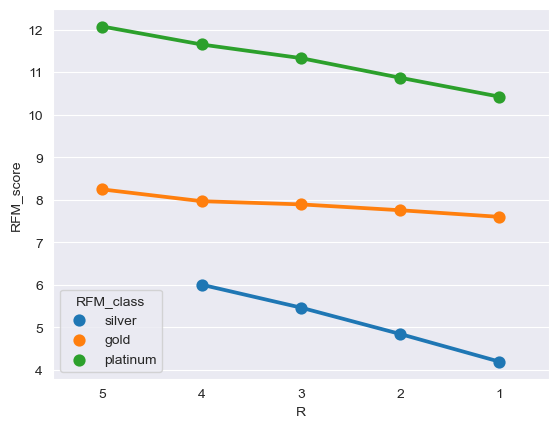

In [45]:
# pointplot으로 x=R, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.
# 시각화를 해서 데이터가 의도한대로 잘 나뉘었는지 확인해 보는 용도입니다.
sns.pointplot(data = rfm, x= 'R', y = 'RFM_score', hue = 'RFM_class', )

<AxesSubplot:xlabel='F', ylabel='RFM_score'>

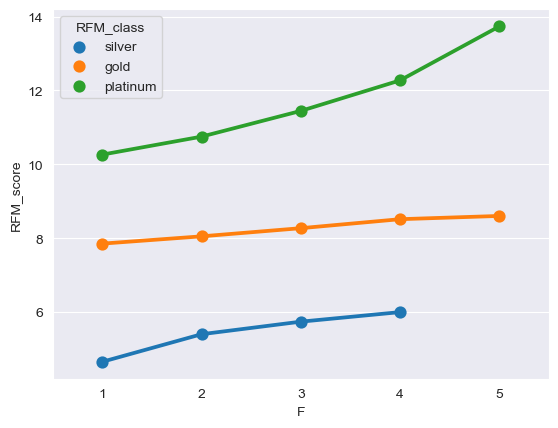

In [46]:
# pointplot으로 x=F, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.
sns.pointplot(data = rfm, x= 'F', y = 'RFM_score', hue = 'RFM_class')

In [47]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm.groupby(['RFM_class']).agg({'Recency':'mean','Frequency':'mean', 'MonetaryValue':["mean", "sum", "count"]})

Recency Frequency MonetaryValue                      
                mean      mean          mean           sum   count
RFM_class                                                         
silver     47.140445  1.124332    155.573685  2.857033e+07  183645
gold       29.252436  1.452386    455.339396  7.716045e+07  169457
platinum   19.311354  4.735105   2125.510509  3.019500e+08  142060

In [48]:
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
rfm.groupby(['RFM_class']).agg({'Recency':'mean',
                                'Frequency':'mean', 
                                'MonetaryValue':["mean", "sum", "count"]}).style.background_gradient(cmap = 'Greens') 

In [49]:
#.style.format("{:,}") 로 천단위에 콤마(,)표기 하도록 문자열 포맷을 지정합니다.
rfm.groupby(['RFM_class']).agg({'Recency':'mean',
                                'Frequency':'mean', 
                                'MonetaryValue':["mean", "sum", "count"]}).style.background_gradient(cmap = 'Greens').format("{:,}") 

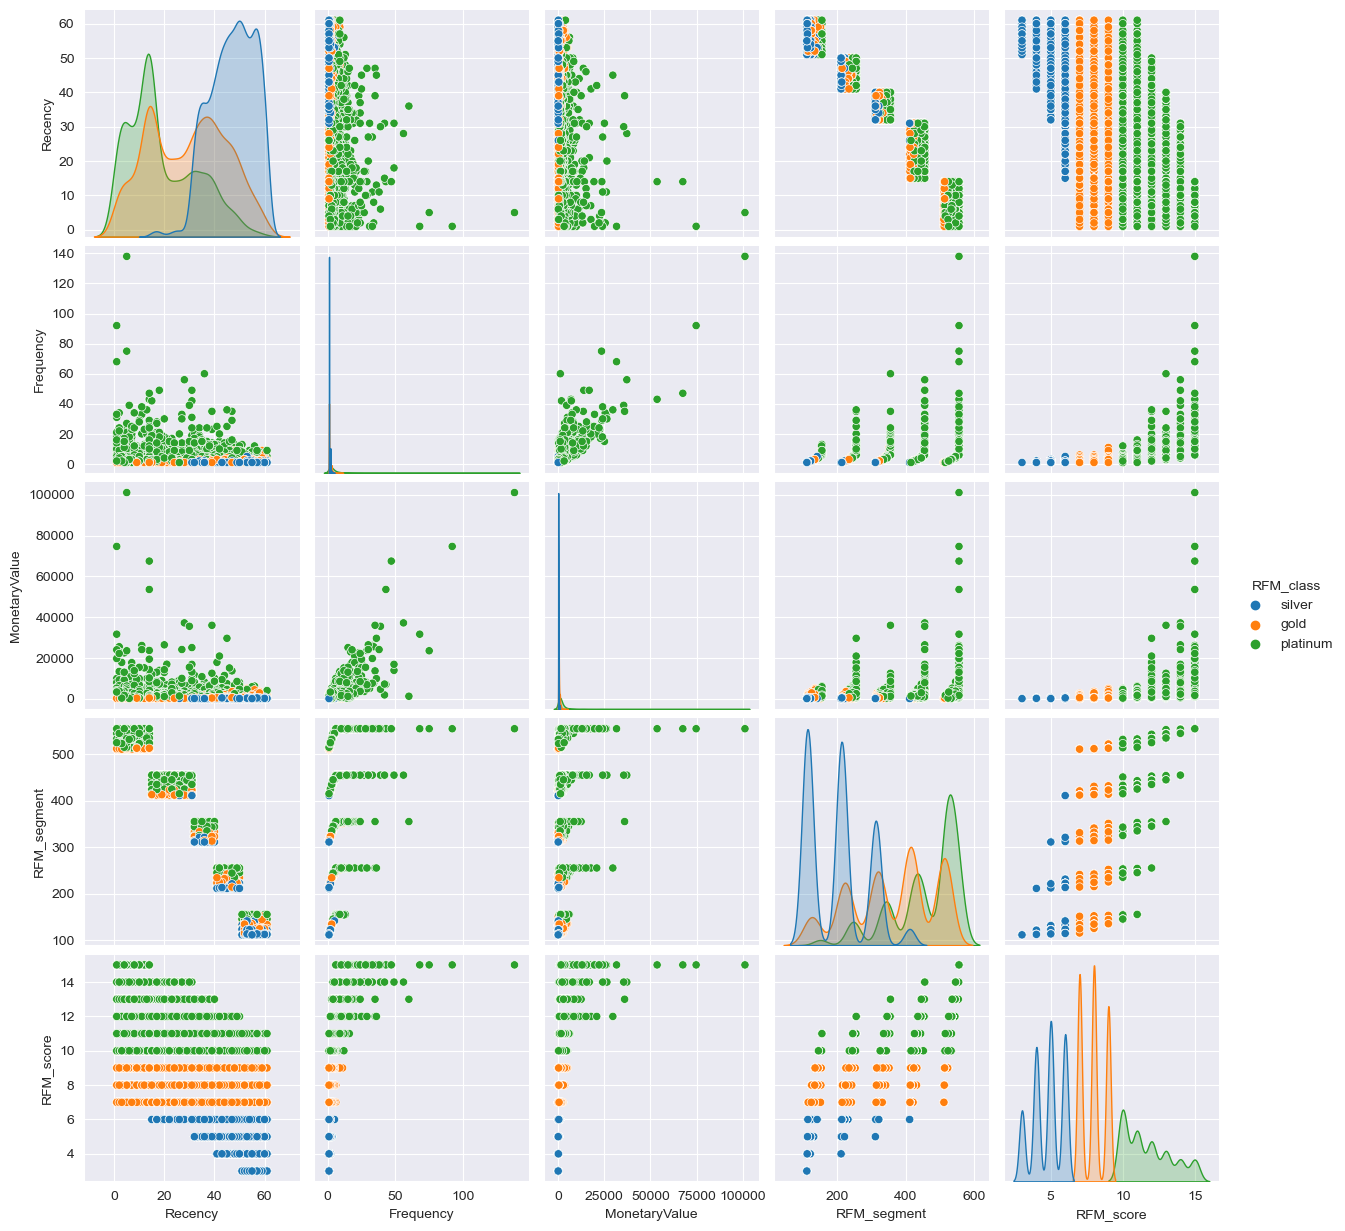

In [50]:
# pairplot 을 통해 "RFM_class" 별로 분포를 시각화 합니다.
sns.pairplot(data = rfm.sample(10000), hue = 'RFM_class')

In [51]:
# .corr() 함수로 변수간 상관관계(선형적 관계)를 분석합니다.
# 1에 가까울 수록 양의 상관관계, -1에 가까울 수록 음의 상관관계를 나타냅니다.
rfm.corr()

,Recency,Frequency,MonetaryValue,RFM_segment,RFM_score
Recency,1.000000,-0.150640,-0.163458,-0.968000,-0.683229
Frequency,-0.150640,1.000000,0.763544,0.185330,0.436066
MonetaryValue,-0.163458,0.763544,1.000000,0.184917,0.398267
RFM_segment,-0.968000,0.185330,0.184917,1.000000,0.744100
RFM_score,-0.683229,0.436066,0.398267,0.744100,1.000000


In [52]:
# 삼각형태의 heatmap 형태를 만들기 위해 삼각형 마스크를 만듭니다.
upp_mat = np.triu(rfm.corr())

<AxesSubplot:>

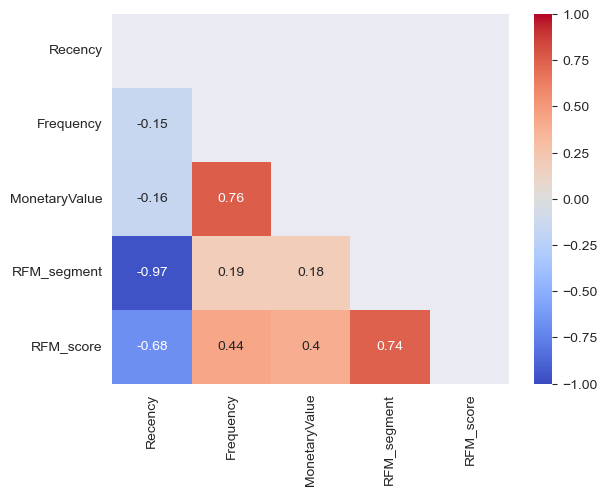

In [53]:
# 상관관계를 열분포 형태의 이미지로 보여주는 heatmap 으로 데이터 시각화합니다.
sns.heatmap(rfm.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [54]:
rfm.to_csv("data/rfm_all.csv")

# 카테고리 smartphone 에서의 DAU, WAU

In [4]:
df = pd.read_parquet('data/df.gzip')

In [5]:
df

,event_time,event_type,product_id,brand,price,user_id,user_session
4,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11+00:00,view,1004545,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
...,...,...,...,...,...,...,...
67501950,2019-11-30 23:59:47+00:00,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d
67501966,2019-11-30 23:59:54+00:00,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb
67501967,2019-11-30 23:59:54+00:00,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26
67501976,2019-11-30 23:59:59+00:00,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27838899 entries, 4 to 67501978
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   brand         object             
 4   price         float64            
 5   user_id       int64              
 6   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 1.7+ GB


In [178]:
dau = df.groupby(df["event_time"].dt.date)["user_id"].nunique()

In [179]:
dau

event_time
2019-10-01    68417
2019-10-02    68223
2019-10-03    66472
2019-10-04    78409
2019-10-05    70207
              ...  
2019-11-26    81087
2019-11-27    82707
2019-11-28    84160
2019-11-29    97467
2019-11-30    87971
Name: user_id, Length: 61, dtype: int64

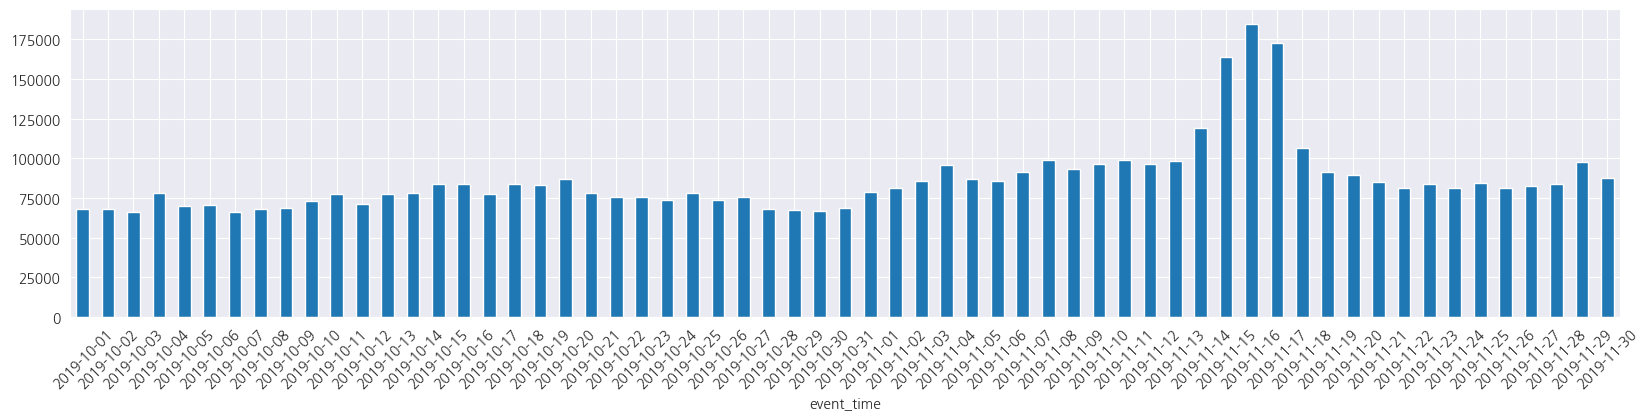

In [193]:
plt.figure(figsize = (20,4))
dau.plot.bar()
plt.xticks(rotation = 45);

In [181]:
# "event_time" 열에서 주간 정보 추출
# 각 주간별 고유 사용자 수 계산
wau = df.groupby(df["event_time"].dt.isocalendar().week)["user_id"].nunique()


In [182]:
wau


week
40    330498
41    381158
42    439175
43    410686
44    397611
45    491052
46    639880
47    471187
48    403038
Name: user_id, dtype: int64

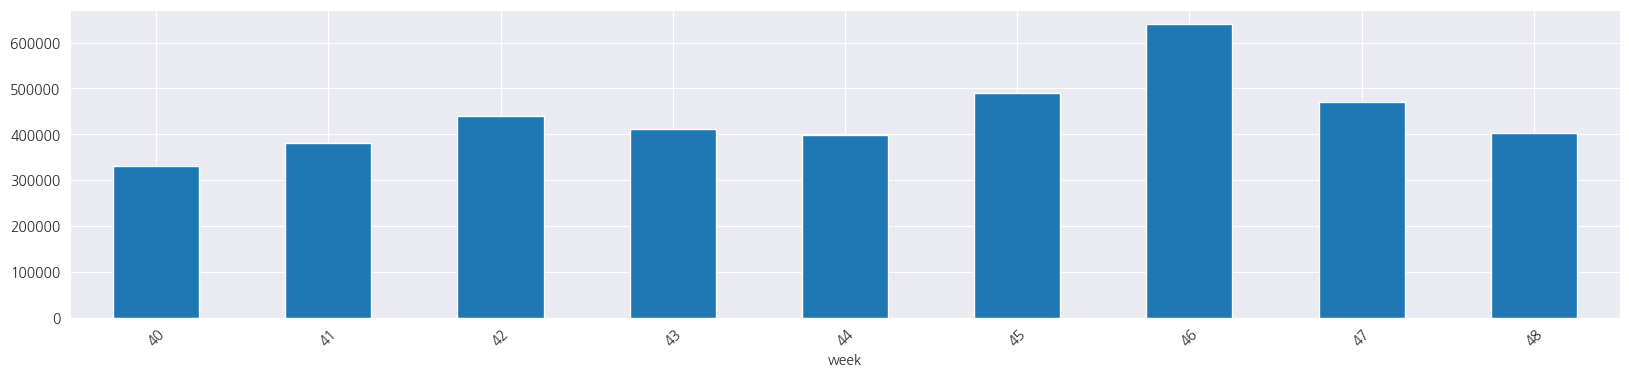

In [194]:
plt.figure(figsize = (20,4))
wau.plot.bar()
plt.xticks(rotation = 45);

# 다음 주 카테고리 스마트폰 방문자수 예측

In [68]:
from sklearn.linear_model import LinearRegression

# X, y 데이터 생성
X = wau[:-1].values.reshape(-1, 1)  # 마지막 주는 예측 대상이므로 제외
y = wau[1:].values

In [69]:
from sklearn.model_selection import train_test_split

# 데이터를 학습용(train) 데이터와 테스트용(test) 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [71]:
# 테스트 데이터를 이용하여 예측 수행
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  21440400484.25419


In [73]:
# 다음 주 방문자 수 예측
next_week = model.predict(wau[-1:].values.reshape(-1, 1))
print("다음 주 방문자 수 예측: ", next_week[0])

다음 주 방문자 수 예측:  416524.8010309942


In [109]:
wau.loc[49] = next_week[0]

<AxesSubplot:xlabel='week'>

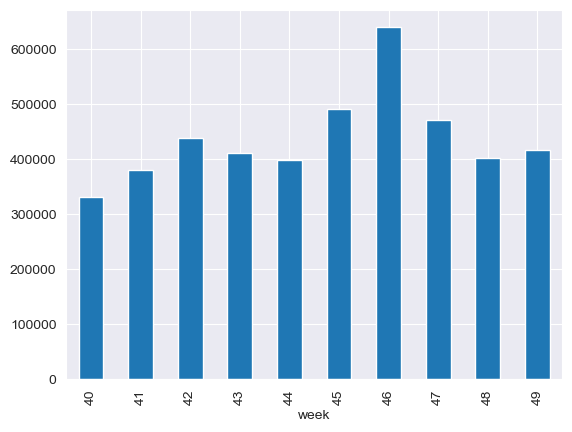

In [112]:
wau.plot.bar()

### 삼성 브랜드 방문자수 확인

In [74]:
df_samsung = df[(df['brand']=='samsung')&(df['event_type']=='view')]
df_samsung

,event_time,event_type,product_id,brand,price,user_id,user_session,date
11,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,2019-10-01
49,2019-10-01 00:00:36+00:00,view,1004767,samsung,254.82,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed,2019-10-01
66,2019-10-01 00:00:55+00:00,view,1004659,samsung,787.18,512558158,9a206ba2-37c7-4354-9d31-37ff3bb297ed,2019-10-01
68,2019-10-01 00:00:57+00:00,view,1004873,samsung,388.81,555447651,c3240a5e-6cb8-4d78-9732-a63c608444ef,2019-10-01
69,2019-10-01 00:00:57+00:00,view,1005073,samsung,1207.71,543427258,4fc3e61d-5f94-45bb-82dc-ac77f59b5870,2019-10-01
...,...,...,...,...,...,...,...,...
67501913,2019-11-30 23:59:35+00:00,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,2019-11-30
67501941,2019-11-30 23:59:43+00:00,view,1004836,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2019-11-30
67501950,2019-11-30 23:59:47+00:00,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d,2019-11-30
67501966,2019-11-30 23:59:54+00:00,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb,2019-11-30


In [131]:
dau = df_samsung.groupby('date')['user_session'].nunique().reset_index()
dau.columns = ['date', 'dau']
dau['next_day_dau'] = dau['dau'].shift(-1)
dau

,date,dau,next_day_dau
0,2019-10-01,36010,36947.0
1,2019-10-02,36947,36086.0
2,2019-10-03,36086,42744.0
3,2019-10-04,42744,37828.0
4,2019-10-05,37828,37163.0
...,...,...,...
56,2019-11-26,44756,45654.0
57,2019-11-27,45654,45857.0
58,2019-11-28,45857,53113.0
59,2019-11-29,53113,49098.0


In [132]:
# 예측 모델 훈련
X = dau[['dau']][:-1]
y = dau['next_day_dau'][:-1]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [133]:
# 테스트 데이터 예측
X_test = dau[['dau']].iloc[-1:]
next_day_dau_pred = model.predict(X_test)

In [134]:
# R2 점수 계산
y_true = dau['next_day_dau'][:-1]
y_pred = model.predict(X)
r2 = r2_score(y_true, y_pred)
print('R2 Score:', r2)
# 0~1까지 

R2 Score: 0.6699058730649103


In [135]:
# 다음 날 방문자 수 예측
next_day_dau_pred[0]

49187.05992108183

In [164]:
dau.loc[dau.index[-1], 'next_day_dau'] = next_day_dau_pred[0]

Text(0.5, 1.0, 'samsung 방문자 수 예측')

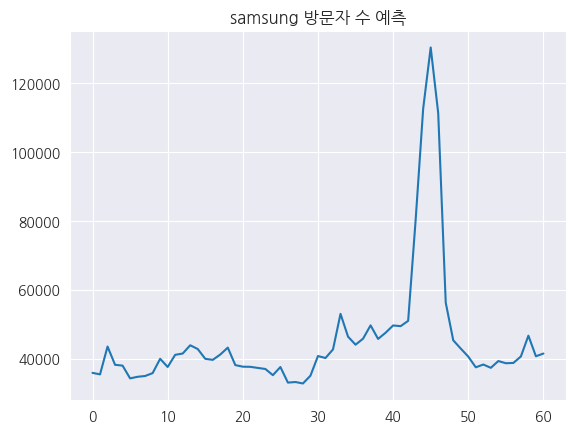

In [177]:
import koreanize_matplotlib

dau['next_day_dau'].plot()
plt.title('samsung 방문자 수 예측')

### 애플 방문자수 확인

In [169]:
df_apple = df[(df['brand']=='apple')&(df['event_type']=='view')]
df_apple

,event_time,event_type,product_id,brand,price,user_id,user_session,date
4,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01
19,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01
20,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f,2019-10-01
25,2019-10-01 00:00:24+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f,2019-10-01
51,2019-10-01 00:00:41+00:00,view,1003141,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da,2019-10-01
...,...,...,...,...,...,...,...,...
67501900,2019-11-30 23:59:29+00:00,view,1005105,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80,2019-11-30
67501923,2019-11-30 23:59:38+00:00,view,1005105,apple,1302.48,561181104,b2c61552-576c-4532-8d1e-ad2a0a9334d4,2019-11-30
67501931,2019-11-30 23:59:41+00:00,view,1004258,apple,810.83,579969045,ee246970-62cb-4105-a049-703cdaee3a26,2019-11-30
67501967,2019-11-30 23:59:54+00:00,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26,2019-11-30


In [170]:
dau = df_apple.groupby('date')['user_session'].nunique().reset_index()
dau.columns = ['date', 'dau']
dau['next_day_dau'] = dau['dau'].shift(-1)
dau

,date,dau,next_day_dau
0,2019-10-01,36683,35915.0
1,2019-10-02,35915,35470.0
2,2019-10-03,35470,43546.0
3,2019-10-04,43546,38250.0
4,2019-10-05,38250,38014.0
...,...,...,...
56,2019-11-26,38705,38791.0
57,2019-11-27,38791,40672.0
58,2019-11-28,40672,46704.0
59,2019-11-29,46704,40730.0


In [171]:
# 예측 모델 훈련
X = dau[['dau']][:-1]
y = dau['next_day_dau'][:-1]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [172]:
# 테스트 데이터 예측
X_test = dau[['dau']].iloc[-1:]
next_day_dau_pred = model.predict(X_test)

In [173]:
# R2 점수 계산
y_true = dau['next_day_dau'][:-1]
y_pred = model.predict(X)
r2 = r2_score(y_true, y_pred)
print('R2 Score:', r2)

R2 Score: 0.7103835195103392


In [174]:
# 다음 날 방문자 수 예측
next_day_dau_pred[0]

41519.58796693915

In [175]:
dau.loc[dau.index[-1], 'next_day_dau'] = next_day_dau_pred[0]

Text(0.5, 1.0, 'apple 방문자 수 예측')

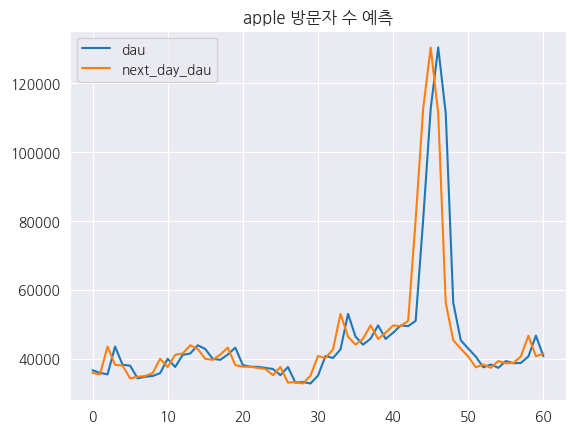

In [176]:
import koreanize_matplotlib

dau.plot()
plt.title('apple 방문자 수 예측')